# Generación de datos sintéticos

````{admonition} Resumen 
:class: tip

Este artículo presenta las líneas de trabajo desarrolladas para la generación de un dataset sintético de tamaño y peso de lenguados, con el objetivo de proporcionar una base de datos suficientemente amplia y representativa para el entrenamiento, validación y mejora de modelos predictivos. Se recogen las metodologías utilizadas en la generación de datos sintéticos, incluyendo la modelización estadística de distribuciones empíricas, técnicas de simulación basadas en procesos de crecimiento biológico y enfoques de aprendizaje automático para la síntesis de datos realistas. Además, se analizan los criterios de validación empleados para garantizar que los datos generados reflejen fielmente las tendencias y variabilidad observadas en poblaciones reales de lenguado (*Solea solea*), asegurando así su utilidad en el desarrollo de algoritmos precisos y generalizables para la predicción del peso a partir de variables alometricas.

**Entregable**: E2.2  
**Versión**: 1.0  
**Autor**: Javier Álvarez Osuna  
**Email**: javier.osuna@fishfarmfeeder.com  
**ORCID**: [0000-0001-7063-1279](https://orcid.org/0000-0001-7063-1279)  
**Licencia**: CC-BY-4.0  
**Código proyecto**: IG408M.2025.000.000072

```{image} .././assets/FLATCLASS_logo_publicidad.png
:width: 100%
:align: center
```

````

## Introducción

En el ámbito de la acuicultura de precisión, la caracterización morfométrica de los peces y su relación con el peso corporal constituye un eje central para la optimización de procesos como la clasificación automática, el control de crecimiento y la dosificación alimentaria. En el caso particular de los peces planos en fase de alevinaje —como el lenguado (Solea solea) o el rodaballo (Scophthalmus maximus)—, las variables morfométricas fundamentales incluyen la longitud corporal, la anchura transversal y la altura dorso-ventral, parámetros que definen la geometría del individuo y que se presumen relacionados de forma sistemática con la biomasa individual.

La necesidad de disponer de un dataset suficientemente amplio, representativo y multivariado, que relacione estas variables morfométricas con el peso corporal correspondiente, responde a múltiples consideraciones de carácter estadístico, biológico y computacional. Aun en ausencia de un modelo alométrico explícito que relacione de forma determinista dichas variables, es posible anticipar que cualquier estrategia de inferencia o predicción del peso basada en dimensiones requerirá una densidad adecuada de datos en el espacio tridimensional definido por longitud, anchura y altura. Este requisito es crítico para garantizar tanto la fidelidad del ajuste como la capacidad de generalización del modelo aprendido.

Cuando el volumen de datos disponibles es reducido, surgen una serie de limitaciones estructurales:

- **Alta varianza en la estimación de parámetros**: La precisión de los modelos predictivos decae significativamente cuando las observaciones son escasas o están mal distribuidas en el dominio de entrada.
- **Riesgo de sobreajuste**: En entornos de datos reducidos, los modelos tienden a capturar ruido en lugar de relaciones funcionales genuinas, lo cual compromete la validez externa.
- **Cobertura insuficiente del espacio morfométrico**: Se produce una pérdida de representatividad en las regiones marginales del dominio, lo que reduce la capacidad del sistema para extrapolar o interpolar en condiciones reales de producción.
- **Sesgos estructurales**: Las muestras pequeñas pueden reflejar sesgos en las condiciones de cría, genética o instrumentación, induciendo patrones espurios no generalizables.

Desde la perspectiva de la matemática probabilística, esta problemática puede entenderse mediante el marco de la inferencia bayesiana. En este enfoque, el conocimiento sobre los parámetros $\theta$ (por ejemplo, la relación entre morfología y peso) se representa como una distribución posterior condicionada a los datos $D$:

$$
p(\theta | D) \propto p(D | \theta) \cdot p(\theta)
$$

donde $D$ representa los datos observados. Cuando el tamaño de $D$ es reducido, la función de verosimilitud $p(D|a,b)$ tiene una varianza alta, lo que genera estimaciones más inciertas. Al aumentar el tamaño de $D$ con datos sintéticos plausibles, la estimación de $p(a,b|D)$ se vuelve más precisa, reduciendo la varianza de los parámetros. 

En el contexto de la acuicultura, la recopilación masiva de medidas biométricas de precisión en alevines presenta limitaciones logísticas y económicas significativas. Por tanto, el uso inteligencia artificial para permite simular observaciones adicionales coherentes con la distribución empírica observada, conservando las correlaciones entre las dimensiones corporales y el peso de los individuos.

En este trabajo se abordó la generación de datos sintéticos mediante tres métodos complementarios: **Gaussian Copula**, **CTGAN** y **TVAE**. Esta aproximación multicriterio permite evaluar de manera comparativa la capacidad de cada técnica para replicar no solo las distribuciones marginales de los datos originales, sino también las dependencias no lineales propias de los modelos alométricos, típicos en biología de organismos. La selección final del método más adecuado se basará en un análisis cuantitativo que incluye: (1) métricas de evaluación de la calidad sintética (KS-test, divergencia KL), (2) precisión en la replicación de las ecuaciones alométricas (RMSE entre valores reales y predichos), y (3) viabilidad computacional. Esta comparación sistemática garantizará que los datos sintéticos amplificados mantengan validez ecológica y estadística, priorizando el método que mejor equilibre fidelidad biológica y escalabilidad, para ser usados en los modelos predictivos de peso.

Los estudios sobre generación de datos sintéticos llevasoa a cabo en el marco de FLATCLASS responden por tanto, a una doble motivación: por un lado, **ampliar artificialmente el conjunto de datos disponible** para entrenar modelos predictivos del peso a partir de variables morfométricas; y por otro, **mantener la coherencia estadística y biológica** de los registros generados, minimizando los riesgos de sobreajuste y mejorando la capacidad de generalización de los modelos desarrollados.


## Gaussian Copula

El método Gaussian Copula destaca por su capacidad para modelar dependencias multivariadas entre variables, preservando la estructura estadística de los datos originales. Este enfoque se basa en la teoría de **cópulas**, que permite desacoplar las distribuciones marginales de las dependencias entre variables, ofreciendo flexibilidad para generar datos sintéticos realistas [[Zheng et al., 2020](https://arxiv.org/pdf/2009.09471)].

Las **cópulas** son funciones que vinculan distribuciones marginales univariadas para formar una distribución multivariada. El teorema de Sklar (1959) establece que cualquier distribución conjunta $H$ de variables aleatorias $(X_1,X_2,...,X_d)$ puede expresarse como:

```{math}
H(x_1,x_2,...,x_d)=C(F_1(x_1),F_2(x_2),...,F_d(d_d))
```

donde $C$ es la cópula y $F_i$ son las funciones de distribución marginal. La Gaussian Copula utiliza una cópula derivada de la distribución normal multivariada, definida como:

$$
C_\Sigma(\mathbf{u}) = \Phi_\Sigma \left( \Phi^{-1}(u_1), \Phi^{-1}(u_2), \dots, \Phi^{-1}(u_d) \right)
$$

donde:

 - $\Phi_\Sigma$: es la función de distribución normal multivariada con matriz de covarianza $\Sigma$
 - $\Phi^{-1}$: es la inversa de la distribución normal estándar (quantile function)
 - $u=(u_1,u_2,...,u_d)$: vector de probabilidades uniformes en $[0,1]$

Los fundamentos matemáticos anteriormente descritos, incluyendo el teorema de Sklar, la transformación al espacio gaussiano mediante funciones inversas $(Φ^{-1)}$, y el muestreo de datos sintéticos basado en la matriz de covarianza $(Σ)$, están implementados de forma eficiente y optimizada dentro de la librería `SDV (Synthetic Data Vault)`. En particular, la clase `GaussianCopula` del módulo `sdv.tabular` encapsula estos modelos matemáticos, permitiendo la generación de datos tabulares sintéticos que preservan tanto las distribuciones marginales $(F_i)$ como las dependencias multivariadas $(C_Σ)$ presentes en los datos originales. La librería automatiza procesos clave como:

 1. La estimación no paramétrica de distribuciones marginales,
 2. El cálculo de la matriz de correlación de rangos (rank correlation), y
 3. La generación de muestras sintéticas mediante inversión de la cópula $(F_{i}^{-1})$.

Además, SDV incorpora validaciones internas para garantizar que los datos generados mantengan propiedades estadísticas consistentes, siguiendo las mejores prácticas descritas en la literatura [[Patki et al., 2016](https://doi.org/10.1109/DSAA.2016.49)].


/Users/jalosuna/WorkSpaces/base12/lib/python3.12/site-packages/sdv/single_table/base.py:133: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



Generating report ...

(1/2) Evaluating Data Validity: |██████████| 4/4 [00:00<00:00, 3587.94it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 1513.10it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 4/4 [00:00<00:00, 1836.59it/s]|
Column Shapes Score: 94.54%

(2/2) Evaluating Column Pair Trends: |██████████| 6/6 [00:00<00:00, 716.91it/s]|
Column Pair Trends Score: 99.26%

Overall Score (Average): 96.9%



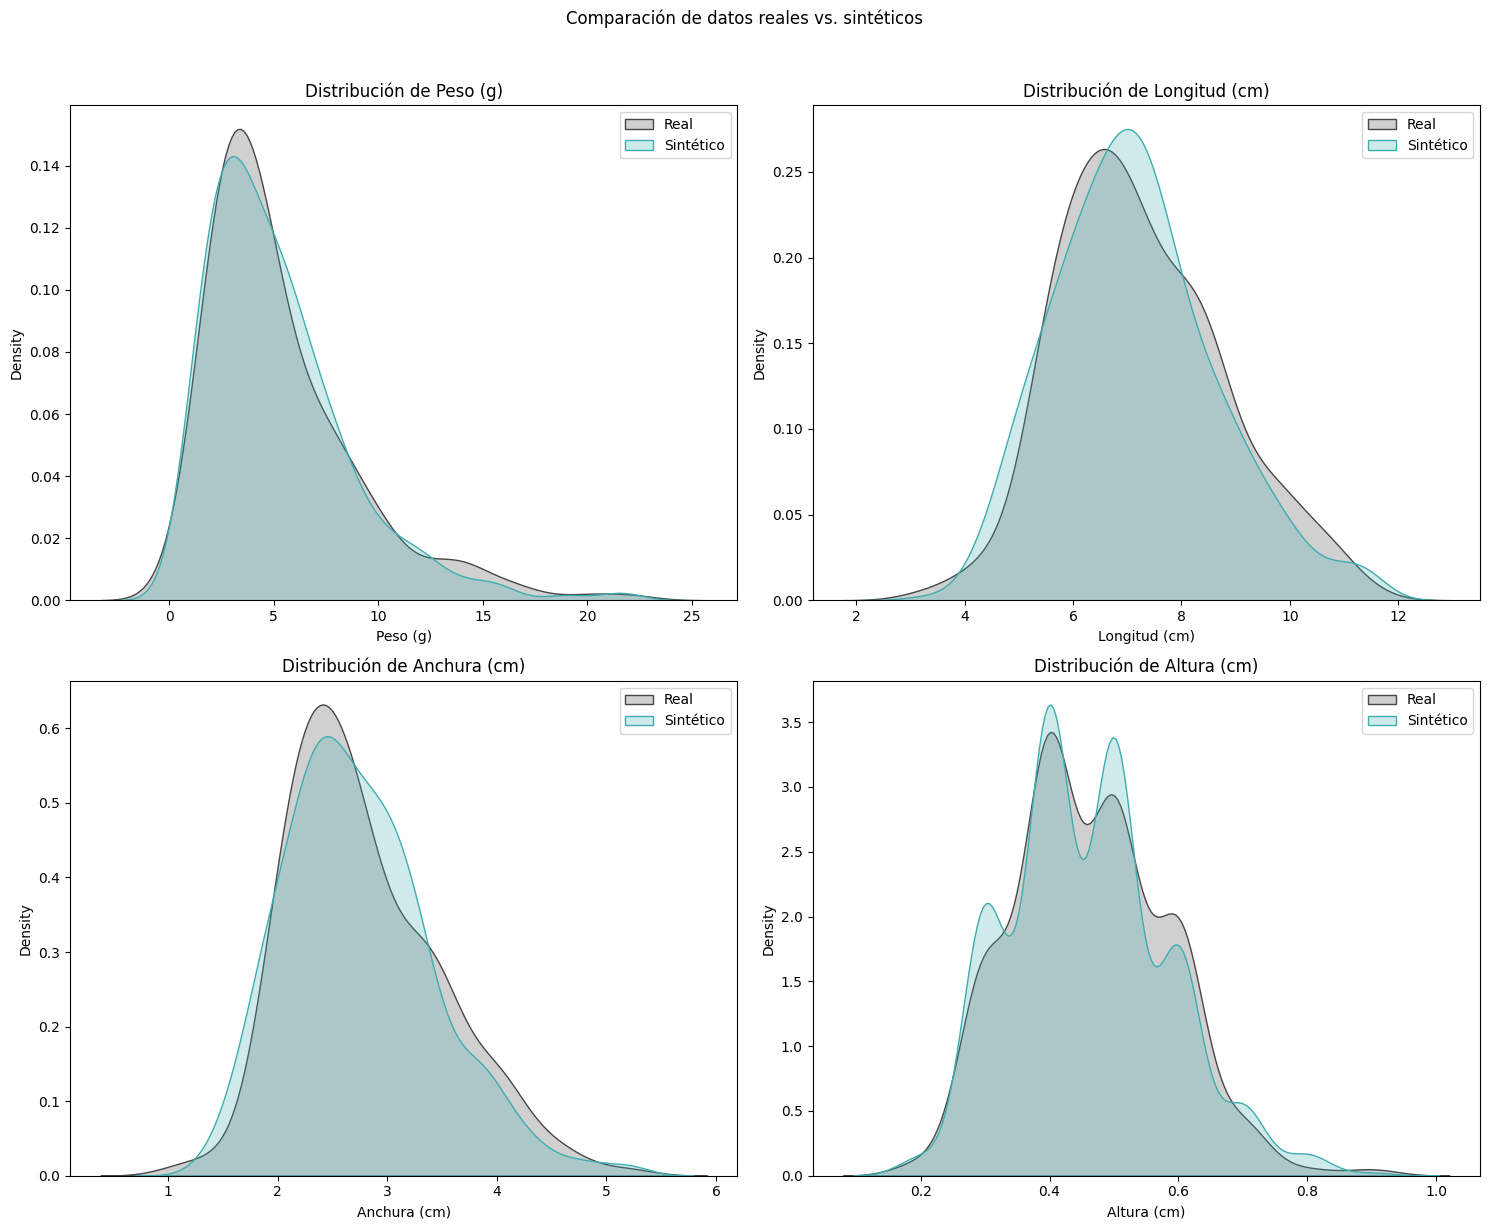

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import Metadata

# 1. Cargar datos reales
path_realData = '.././data/Dimensiones_lenguado.xlsx'  
real_data = pd.read_excel(path_realData)

# 2. Obtener los metadata del dataset
metadata = Metadata.detect_from_dataframe(real_data)

# 3. Sintetizar datos
synthesizer = GaussianCopulaSynthesizer(
    metadata = metadata,
    enforce_min_max_values = True, # Forzar datos realísticos
    enforce_rounding = True # Redondeos automáticos
    )

synthesizer.fit(real_data)
synthetic_data = synthesizer.sample(num_rows=500)

# 4. Guardar satos sintéticos
path_syntheticData = ".././data/SinteticGaussianCopula.xlsx"
synthetic_data.to_excel(path_syntheticData, index=False, engine='openpyxl')

# 5. Validación calidad datos sintéticos
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot

## Diagnóstico básico
diagnostic = run_diagnostic(real_data, synthetic_data, metadata) 

## Medidas de similiud estadística
quality_report = evaluate_quality(real_data, synthetic_data, metadata)

## Visulaización de datos
from sdv.evaluation.single_table import get_column_plot
import seaborn as sns

## Lista de columnas a visualizar
columnas = ["Peso (g)", "Longitud (cm)", "Anchura (cm)", "Altura (cm)"]

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
for i, col in enumerate(columnas):
    ax = axs[i//2, i%2]
    sns.kdeplot(real_data[col], ax=ax, label='Real', fill=True, color="#464746")
    sns.kdeplot(synthetic_data[col], ax=ax, label='Sintético', fill=True, color="#3EADB0")
    ax.set_title(f'Distribución de {col}')
    ax.legend()
plt.suptitle('Comparación de datos reales vs. sintéticos', y=1.02)
plt.tight_layout()
plt.show()

Los resultados obtenidos indican un alto grado de similitud entre los datos sintéticos y reales. El valor de `Column Shapes Score` $(94,74\%)$ evalúa como las distribuciones univariadas (forma, media, dispersión) de cada columna individual se preservan en los datos sintéticos. Por otro lado, el valor obtenido en `Column Pair Trends Score` $(99.03\%)$ nos indican que las tendencias conjuntas son prácticamente indistinguibles y pro lo tanto el conjunto de datos sintéticos obtendio mantiene las dependencias complejas (relaciones multivariadas) entre las variables.

## Conditional Tabular GAN (CTGAN)

CTGAN es una variación de las **Redes Generativas Adversarias (GAN, por sus siglas en inglés)** especialmente diseñado para conjuntos de datos tabulares, una categoría que históricamente ha planteado desafíos significativos en el campo del aprendizaje automático generativo. Las redes antagónicas generativas o redes adversarias generativas (GANs) son un método para la optimización competitivo entre dos redes neuronales, una llamada generadora y otra discriminadora, con el objetivo de conseguir generar nuevas instancias idealmente indistinguibles a las pertenecientes a la distribución de probabilidad de la que derivan los datos de entrenamiento.

Las GANs, originalmente concebidas para tareas de síntesis de imágenes [[Goodfellow et al., 2014](https://doi.org/10.1145/3422622)], han demostrado en los últimos años una notable capacidad para modelar distribuciones complejas en espacios tabulares multivariantes, especialmente en dominios donde los datos reales son escasos o costosos de obtener. El fundamento teórico general del que derivan, permite su utilización para la generación de cualquier tipo de datos, habiéndose demostrado efectiva en campos diversos como son la visión por computador [[Roy et al., 2015](https://doi.org/10.48550/arXiv.1505.03906), [Karras et al., 2017](https://doi.org/10.48550/arXiv.1710.10196)], la segmentación semántica [[Hoffman et al., 2017](https://doi.org/10.48550/arXiv.1711.03213)], la síntesis de series temporales [[Hartmann et al., 2018](https://doi.org/10.48550/arXiv.1806.01875)], la edición de imagen [[Abdal et al., 2020](https://doi.org/10.1145/3447648)], el procesamiento del lenguaje natural [[Fedus et al., 2018](https://doi.org/10.48550/arXiv.1801.07736)], la generación de imagen a partir de texto [[Radford et al., 2021](https://doi.org/10.48550/arXiv.2103.00020)] y más recientemente [Xu et al. (2023)](https://doi.org/10.1007/s00778-023-00807-y) demuestran que las GANs superan a técnicas convencionales de síntesis en la preservación de estructuras de dependencia no lineal en variables tabulares reales de alta dimensión.

Para cualquier conjunto de datos, podemos hipotetizar que es posible definir una distribución de probabilidad $P_{data}$ representativa de la población representada por la muestra formada por el conjunto de datos. De ser esto posible, para cualquier valor de $x$ será posible establecer un valor $P_{data}(x)$ que determine la probabilidad de que $x$ pertenezca a la población. De existir una función de este tipo, sería una función discriminativa que dada una instancia permitiría conocer la probabilidad de pertenencia a la población. Los modelos generativos modelizan la distribución de probabilidad mencionada pero no proporcionan un valor de probabilidad, sino que generan instancias nuevas que pertenecen a distribuciones de probabilidad próximas a la que pretenden asemejar. Las GANs definen un esquema de aprendizaje que facilita la codificación de los atributos definitorios de la distribución de probabilidad en una red neuronal de manera que la red incorpore la información esencial que le permite generar instancias pertenecientes a distribuciones de probabilidad próximas a la que el conjunto de datos que pretende representar.

La arquitectura de las Redes Generativas Adversarias (GAN, por sus siglas en inglés) se basa en la interacción entre dos redes neuronales que trabajan de forma opuesta pero complementaria: una red generadora $(G)$ y una red discriminadora $(D)$. La red generadora tiene como objetivo crear datos sintéticos que imiten con la mayor fidelidad posible los datos reales del conjunto original. Por su parte, la red discriminadora actúa como un detector, cuya tarea es evaluar si una determinada entrada procede del conjunto de datos reales o ha sido generada artificialmente por $G$.

Durante el proceso de entrenamiento, ambas redes se enfrentan en un proceso competitivo. La generadora intenta “engañar” a la discriminadora creando datos cada vez más realistas, mientras que la discriminadora se entrena para detectar con mayor precisión las falsificaciones. Este enfoque adversarial permite que ambas redes mejoren progresivamente: $G$ produce datos sintéticos más convincentes y $D$ refina sus capacidades de detección. Esta dinámica se puede entender como un juego de suma cero, donde el éxito de una red implica el fracaso de la otra, y que teóricamente puede llevar a un punto en el que ninguna de las redes puede mejorar su rendimiento sin afectar negativamente a la otra (equilibrio de Nash).

```{figure} .././assets/Modelo_GAN.png
:name: Figura_2.1
:alt: Diagrama del proceso de entrenamiento de las redes adversarias generativas
:width: 100%
:align: center

Modelo funcional de una red GAN
```

En la figura se muestra un diagrama representativo del proceso de optimización de las GAN. La **red generadora** $G(z)$ recibe como entrada un vector de ruido aleatorio $z$, generado a partir de una distribución conocida $p_z$, y produce como salida un dato sintético $x_{fake}$ que intenta imitar los datos reales. La **red discriminadora** $D(x)$ recibe como entrada un dato $x_{real}$  o $x_{fake}$ (generado) y devuelve una probabilidad `D(x)` entre $0$ y $1$ que indica cuán probable es que $x$ provenga del conjunto real de datos.

Amabas redes se consideran antagónicas dado que sus objetivos son opuestos:

- $D$ quiere **maximizar** la probabilidad de detectar correctamente los datos reales y rechazar los sintéticos.
- $G$ quiere **minimizar** la probabilidad de que $D$ detecte que sus datos son falsos.

El proceso se modela como un **juego de suma cero** mediante la siguiente función objetivo:

$$
\min_G \max_D V(D, G) = \mathbb{E}_{x \sim p_{\text{datos}}(x)}[\log D(x)] + \mathbb{E}_{z \sim p_z(z)}[\log(1 - D(G(z)))]
$$

- El primer término recompensa a $D$ por identificar correctamente datos reales.
- El segundo término recompensa a $D$ por detectar correctamente los datos generados por $G$.

Mientras tanto, $G$ intenta minimizar esta función engañando a $D$, es decir, haciendo que $D(G(z))$ sea lo más cercano posible a 1.

Durante el entrenamiento, ambas redes mejoran iterativamente. Teóricamente, el proceso puede converger a un **equilibrio de Nash**, en el que $G$ genera datos tan similares a los reales que $D$ no puede distinguir entre ellos, y devuelve aproximadamente:

$$
D(x) \approx 0.5
$$

En ese punto, el sistema ha alcanzado un equilibrio: ni $G$ ni $D$ pueden mejorar sin perjudicar a la otra red.

El modelo CTGAN (Conditional Tabular GAN) representa un enfoque avanzado de generación de datos sintéticos específicamente diseñado para conjuntos de datos tabulares, una categoría que históricamente ha planteado desafíos significativos en el campo del aprendizaje automático generativo. A diferencia de las GANs tradicionales, orientadas principalmente a la síntesis de datos en dominios estructurados como imágenes o secuencias temporales, los datos tabulares presentan heterogeneidad tipológica (variables continuas, categóricas y ordinales) y complejas dependencias estadísticas interatributo. CTGAN resuelve esta complejidad mediante una arquitectura condicional que permite preservar la distribución marginal y condicional de cada atributo, logrando generar muestras sintéticas estadísticamente similares y coherentes con los datos originales.

Al igual que las GAN, su diseño se basa en un esquema adversarial compuesto por dos redes neuronales: el generador, que crea datos sintéticos a partir de ruido aleatorio y vectores condicionales, y el discriminador, que evalúa la autenticidad de los datos. Una innovación clave de CTGAN es el uso estratégico de funciones de activación, particularmente ReLU (Rectified Linear Unit) y LeakyReLU, que optimizan el flujo de gradientes durante el entrenamiento.

En el **generador** se emplea ReLU, para promover una activación fuerte y directa.

```{admonition} ReLU ((Rectified Linear Unit)
La **función de activación `ReLU` (Rectified Linear Unit)** es una de las funciones no lineales más utilizadas en redes neuronales profundas debido a su simplicidad y eficacia computacional. Se define como $\text{ReLU}(x) = \max(0, x)$, lo que implica que las salidas negativas se eliminan (se convierten en cero) mientras que las positivas se mantienen sin alteración. Esta propiedad introduce no linealidad en la red neuronal, permite que las neuronas se activen solo cuando es necesario y, al mismo tiempo, evita problemas de saturación que se presentan en otras funciones. Sin embargo, `ReLU` puede presentar el problema del “apagado de neuronas” (dead neurons), cuando los valores de entrada son negativos de forma persistente, impidiendo que esas neuronas contribuyan al aprendizaje.
```

Por otro lado, el **discriminador** utiliza Leaky ReLU (que anula los valores negarios) para evitar el colapso de unidades activas y asegurar una mejor capacidad de detección de patrones tanto en regiones positivas como negativas del espacio de entrada.

```{admonition} Leaky ReLU
Leaky ReLU es una evolución de la función de activación ReLU especialmente orientada a solventar el problema de “apagado de neuronas” (dead neurons), cuando los valores de entrada son negativos de forma persistente, impidiendo que esas neuronas contribuyan al aprendizaje. Esta función introduce una variante al considerar una pequeña pendiente negativa para los valores menores que cero. Su definición es:

$$
\text{LeakyReLU}(x) =
\begin{cases}
x & \text{si } x \geq 0 \\
\alpha x & \text{si } x < 0
\end{cases}
$$

donde $\alpha$ es un pequeño valor positivo, típicamente $0.01$. Esta modificación permite que las neuronas continúen actualizando sus pesos incluso cuando sus entradas son negativas, lo que favorece una mejor propagación del gradiente durante el entrenamiento y mejora la robustez de la red.

```

Tanto el generador como el discriminador de la red CTGAN están compuestos por **cuatro capas ocultas densamente conectadas** (*fully connected layers*) con **64 neuronass** que responden a un compromiso técnico entre capacidad representacional, estabilidad del entrenamiento y eficiencia computacional, especialmente en el contexto de modelos generativos aplicados a datos tabulares de baja dimensionalidad, como es el caso de las variables morfométricas (longitud, anchura, altura y peso) de juveniles de peces.

Desde un punto de vista práctico, 64 unidades por capa ofrecen una capacidad suficiente para capturar relaciones no lineales complejas entre las variables del espacio latente y las características morfológicas de salida, sin llegar a una sobreparametrización excesiva que pueda inducir sobreajuste o inestabilidad adversarial durante el entrenamiento de la GAN. Esta elección proporciona un número razonable de parámetros entrenables, lo cual resulta adecuado cuando se trabaja con conjuntos de datos de tamaño moderado, como ocurre en nuestro caso.

A este respecto, estudios recientes sobre GANs para datos tabulares —como CTAB-GAN+ [[Zao et al., 2024](https://doi.org/10.3389/fdata.2023.1296508)] y CTGAN [[Liu et al., 2023](https://doi.org/10.1007/s00778-023-00807-y)]— concluyen que arquitecturas con capas ocultas de entre 64 y 128 neuronas suelen alcanzar un buen equilibrio entre precisión, velocidad de convergencia y estabilidad del discriminador. Por debajo de este umbral (p.e., 16 o 32 neuronas), se puede observar pérdida de capacidad expresiva, mientras que valores superiores (p.e., 256) pueden ser innecesarios para problemas con pocos atributos y generar ruido o fluctuaciones en el aprendizaje entre adversarios.


